# Prediccion de alquiler de Monopatines en Berlin, Alemania 

## EDA

### Carga y Revision inicial 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# url = "https://raw.githubusercontent.com/[usuario]/[repositorio]/[rama]/dataset.csv"
# df = pd.read_csv(url)

df = pd.read_csv("dataset_alquiler.csv")

In [3]:
df.head()

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
0,1,2011-01-01,1,0,1,0.0,0,6.0,0,1,0.24,0.2879,0.81,0.0,3,13,16.0
1,2,2011-01-01,1,0,1,1.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,8,32,40.0
2,3,2011-01-01,1,0,1,2.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,5,27,32.0
3,4,2011-01-01,1,0,1,3.0,0,6.0,0,1,0.24,0.2879,0.75,0.0,3,10,13.0
4,5,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0,0,1,1.0


### Verificar estructura y tipos de datos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   indice             17379 non-null  int64  
 1   fecha              17379 non-null  object 
 2   temporada          17379 non-null  int64  
 3   anio               17379 non-null  int64  
 4   mes                17379 non-null  int64  
 5   hora               17369 non-null  float64
 6   feriado            17379 non-null  int64  
 7   dia_semana         17369 non-null  float64
 8   dia_trabajo        17379 non-null  int64  
 9   clima              17379 non-null  int64  
 10  temperatura        17379 non-null  float64
 11  sensacion_termica  17379 non-null  float64
 12  humedad            17379 non-null  float64
 13  velocidad_viento   17379 non-null  float64
 14  u_casuales         17379 non-null  int64  
 15  u_registrados      17379 non-null  int64  
 16  total_alquileres   173

In [5]:
df.describe()

,indice,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
count,17379.0000,17379.000000,17379.000000,17379.000000,17369.000000,17379.000000,17369.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17369.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546779,0.028770,3.002533,0.682721,1.425283,0.496987,34.169650,0.627229,18.761185,35.676218,153.786869,189.547527
std,5017.0295,1.106918,0.500008,3.438776,6.915469,0.167165,2.005633,0.465431,0.639357,0.192556,133.462049,0.192930,57.544937,49.305030,151.357286,181.401604
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.348500,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,0.630000,0.223900,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.636400,0.780000,0.298500,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,803.000000,1.000000,806.000000,367.000000,886.000000,977.000000


### ¿Qué se detecta a simple vista?

**Correctos**: `Indice`, `temporada`, `anio`, `mes`, `hora`, `feriado`, `dia_trabajo`, `clima`, `temperatura`, `humedad`  
**Posibles outliers**: `Sensacion_termica`, `velocidad_viento`  
**Eliminar**: `u_casuales`, `u_registrados`

**Variables categoricas**: `temporada`, `anio`, `mes`, `hora`, `feriado`, `dia_trabajo`, `clima`  
**Variables numericas**: `temperatura`, `humedad`, `Sensacion_termica`, `velocidad_viento`  
**Varible target numerica**: `total_alquileres`

In [6]:
df.dtypes

indice                 int64
fecha                 object
temporada              int64
anio                   int64
mes                    int64
hora                 float64
feriado                int64
dia_semana           float64
dia_trabajo            int64
clima                  int64
temperatura          float64
sensacion_termica    float64
humedad              float64
velocidad_viento     float64
u_casuales             int64
u_registrados          int64
total_alquileres     float64
dtype: object

### Deteccion de valores nulos

In [7]:
df.isnull().sum()

indice                0
fecha                 0
temporada             0
anio                  0
mes                   0
hora                 10
feriado               0
dia_semana           10
dia_trabajo           0
clima                 0
temperatura           0
sensacion_termica     0
humedad               0
velocidad_viento      0
u_casuales            0
u_registrados         0
total_alquileres     10
dtype: int64

In [8]:
# Filas con valores nulos en dia_semana? 
df[df['dia_semana'].isnull()]

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
4,5,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0000,0,1,1.0
5,6,2011-01-01,1,0,1,5.0,0,NaN,0,2,0.24,0.2576,0.75,0.0896,0,1,1.0
6,7,2011-01-01,1,0,1,6.0,0,NaN,0,1,0.22,0.2727,0.80,0.0000,2,0,2.0
7,8,2011-01-01,1,0,1,7.0,0,NaN,0,1,0.20,0.2576,0.86,0.0000,1,2,3.0
8,9,2011-01-01,1,0,1,8.0,0,NaN,0,1,0.24,0.2879,0.75,0.0000,1,7,8.0
129,130,2011-01-06,1,0,1,15.0,0,NaN,1,1,0.28,0.2727,0.36,0.0000,8,54,62.0
130,131,2011-01-06,1,0,1,16.0,0,NaN,1,1,0.26,0.2576,0.38,0.1642,12,74,86.0
131,132,2011-01-06,1,0,1,17.0,0,NaN,1,1,0.22,0.2273,0.51,0.1642,9,163,172.0
132,133,2011-01-06,1,0,1,18.0,0,NaN,1,1,0.22,0.2273,0.51,0.1343,5,158,163.0
133,134,2011-01-06,1,0,1,19.0,0,NaN,1,1,0.22,0.2576,0.55,0.0896,3,109,112.0


In [9]:
# Filas con valores nulos en hora? 
df[df['hora'].isnull()]

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
314,315,2011-01-14,1,0,1,NaN,0,5.0,1,1,0.22,0.2121,0.41,0.2836,5,59,64.0
315,316,2011-01-14,1,0,1,NaN,0,5.0,1,1,0.24,0.2424,0.38,0.1642,9,59,68.0
316,317,2011-01-14,1,0,1,NaN,0,5.0,1,1,0.22,0.2424,0.41,0.1045,3,87,90.0
317,318,2011-01-14,1,0,1,NaN,0,5.0,1,1,0.22,0.2273,0.41,0.1642,4,155,159.0
318,319,2011-01-14,1,0,1,NaN,0,5.0,1,1,0.20,0.2576,0.47,0.0000,5,134,139.0
599,600,2011-01-28,1,0,1,NaN,0,5.0,1,2,0.18,0.2121,0.80,0.1045,0,4,4.0
600,601,2011-01-28,1,0,1,NaN,0,5.0,1,2,0.18,197.0000,0.80,0.1343,0,16,16.0
601,602,2011-01-28,1,0,1,NaN,0,5.0,1,2,0.16,197.0000,0.86,0.0896,2,58,60.0
602,603,2011-01-28,1,0,1,NaN,0,5.0,1,2,0.16,197.0000,0.86,0.0896,2,155,157.0
603,604,2011-01-28,1,0,1,NaN,0,5.0,1,3,0.18,0.2121,0.86,0.0896,6,95,101.0


In [10]:
df[df['total_alquileres'].isnull()]

,indice,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,u_casuales,u_registrados,total_alquileres
91,92,2011-01-04,1,0,1,23.0,0,2.0,1,1,0.20,0.2273,0.69,0.0896,2,9,NaN
92,93,2011-01-05,1,0,1,0.0,0,3.0,1,1,0.20,0.2576,0.64,0.0000,0,6,NaN
93,94,2011-01-05,1,0,1,1.0,0,3.0,1,1,0.16,197.0000,0.74,0.0896,0,6,NaN
94,95,2011-01-05,1,0,1,2.0,0,3.0,1,1,0.16,197.0000,0.74,0.0896,0,2,NaN
95,96,2011-01-05,1,0,1,4.0,0,3.0,1,1,0.24,0.2273,0.48,0.2239,0,2,NaN
5495,5496,2011-08-21,3,0,8,21.0,0,0.0,0,1,0.70,0.6667,0.79,0.2537,45,93,NaN
5496,5497,2011-08-21,3,0,8,22.0,0,0.0,0,2,0.70,0.6667,0.79,194.0000,37,97,NaN
5497,5498,2011-08-21,3,0,8,23.0,0,0.0,0,1,0.70,0.6667,0.74,0.1642,20,48,NaN
5498,5499,2011-08-22,3,0,8,0.0,0,1.0,1,1,0.68,0.6364,0.79,0.1642,18,22,NaN
5499,5500,2011-08-22,3,0,8,1.0,0,1.0,1,1,0.68,0.6364,0.79,0.0896,8,13,NaN


Cada uno de los 3 features tiene 10 valores nulos, en una misma fila no existe mas de solo un valor nulo 

In [11]:
df[['temporada']].value_counts()

temporada
3            4496
2            4409
1            4242
4            4232
Name: count, dtype: int64

In [12]:
df[['mes']].value_counts()

mes
7      1488
5      1488
12     1483
8      1475
3      1473
10     1451
6      1440
4      1437
9      1437
11     1437
1      1429
2      1341
Name: count, dtype: int64

In [13]:
df[['anio']].value_counts()

anio
1       8734
0       8645
Name: count, dtype: int64

In [14]:
df[['hora']].value_counts()

hora
16.0    729
17.0    729
13.0    729
14.0    728
15.0    728
12.0    728
19.0    728
20.0    728
22.0    728
21.0    728
23.0    728
10.0    727
11.0    727
18.0    727
7.0     726
0.0     726
9.0     726
8.0     726
1.0     724
6.0     724
5.0     716
2.0     715
4.0     697
3.0     697
Name: count, dtype: int64

In [15]:
df[['fecha']].value_counts()

fecha     
2012-12-31    24
2011-01-01    24
2012-12-30    24
2012-12-29    24
2012-12-28    24
              ..
2011-01-26    16
2011-01-18    12
2012-10-30    11
2011-01-27     8
2012-10-29     1
Name: count, Length: 731, dtype: int64

In [16]:
df[['feriado']].value_counts()

feriado
0          16879
1            500
Name: count, dtype: int64

In [17]:
df[['clima']].value_counts()

clima
1        11413
2         4544
3         1419
4            3
Name: count, dtype: int64

In [18]:
df[['temperatura']].value_counts()

temperatura
0.62           726
0.66           693
0.64           692
0.70           690
0.60           675
0.36           671
0.34           645
0.30           641
0.40           614
0.32           611
0.56           579
0.72           570
0.54           569
0.26           559
0.46           559
0.52           556
0.42           548
0.50           531
0.24           522
0.74           516
0.44           507
0.22           421
0.76           396
0.38           372
0.20           354
0.68           349
0.80           325
0.58           305
0.28           301
0.48           288
0.16           230
0.82           213
0.78           169
0.18           155
0.14           138
0.84           138
0.86           131
0.90            90
0.12            76
0.88            53
0.10            51
0.92            49
0.94            17
0.08            17
0.02            17
0.04            16
0.06            16
0.96            16
0.98             1
1.00             1
Name: count, dtype: int64

In [19]:
df['fecha'][0].split("-")[0]

'2011'

In [20]:
dfaux = []
for fecha in df['fecha']:
    dfaux.append(fecha.split("-")[0])

set(dfaux)

{'2011', '2012'}

In [21]:
## Sera que la variable anio es 0 o 1 y esto corresponde a si fue 2011 o 2012 siendo 0 2011 y 1 2012? 
'''
def verificar_anio(df):
    flag = 1
    for fecha in df['fecha']:
        if fecha.split("-")[0] == 
'''

def verificar_anio(lista):
    flag = 1
    for anio in lista:
        if anio == 2011 and df['anio'] != 0: flag = 0 
        if anio == 2012 and df['anio'] != 1: flag = 0

    return flag

verificar_anio(dfaux)

1

Esto quiere decir que esta correcto y que 2011 pertence a 0 y 2012 a 1, no hay incongruencias

### Analisis de columnas problematicas

dia_semana: Tiene valores nulos (¿deberíamos imputarlos?).   
velocidad_viento: Tiene valores extremos como 194 (¿error de medición?).   
u_casuales, u_registrados: Columnas a eliminar (según el enunciado).   
fecha: Podría convertirse en tipo datetime para extraer más features.   

### Limpieza (Data Cleaning)

In [22]:
# Eliminar columnas no requeridas directamente en df (según el enunciado)
df.drop(columns=['u_casuales', 'u_registrados', 'indice'], inplace=True, errors='ignore')

# Convertir 'fecha' a datetime en el mismo df
df['fecha'] = pd.to_datetime(df['fecha'])

# Guardar dataset limpio (opcional) - ahora será el df original modificado
df.to_csv("dataset1.csv", index=False)

In [23]:
df.head()

,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres
0,2011-01-01,1,0,1,0.0,0,6.0,0,1,0.24,0.2879,0.81,0.0,16.0
1,2011-01-01,1,0,1,1.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,40.0
2,2011-01-01,1,0,1,2.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,32.0
3,2011-01-01,1,0,1,3.0,0,6.0,0,1,0.24,0.2879,0.75,0.0,13.0
4,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0,1.0


In [24]:
df.describe()

,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres
count,17379,17379.000000,17379.000000,17379.000000,17369.000000,17379.000000,17369.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17369.000000
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546779,0.028770,3.002533,0.682721,1.425283,0.496987,34.169650,0.627229,18.761185,189.547527
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.348500,0.480000,0.104500,40.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,0.630000,0.223900,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.636400,0.780000,0.298500,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,803.000000,1.000000,806.000000,977.000000
std,NaN,1.106918,0.500008,3.438776,6.915469,0.167165,2.005633,0.465431,0.639357,0.192556,133.462049,0.192930,57.544937,181.401604


In [25]:
def verificar_fechas(df, col_fecha='fecha', col_anio='anio', col_mes='mes', col_hora='hora', col_dia='dia_semana'):
    """
    Verifica que las columnas de fecha, año, mes y hora sean coherentes.
    - anio=0 debe ser 2011, anio=1 debe ser 2012.
    - Devuelve un DataFrame solo con las filas inconsistentes, sin modificar el original.
    """
    # Hacer una copia para no modificar el original
    temp_df = df.copy()
    
    # Convertir a datetime y extraer componentes
    temp_df[col_fecha] = pd.to_datetime(temp_df[col_fecha])
    fecha_anio = temp_df[col_fecha].dt.year
    fecha_mes = temp_df[col_fecha].dt.month
    fecha_dia = ((temp_df[col_fecha].dt.dayofweek)+1)%7
    
    # Mapear anio numérico a año real
    anio_real = temp_df[col_anio].apply(lambda x: 2011 if x == 0 else (2012 if x == 1 else None))
    
    # Verificar inconsistencias
    mask = (
        (fecha_anio != anio_real) | 
        (fecha_mes != temp_df[col_mes]) |
        (fecha_dia != temp_df[col_dia])
        #(temp_df[col_hora] != temp_df[col_fecha].dt.hour)
    )
    
    # Filtrar solo filas inconsistentes
    inconsistentes = temp_df[mask].copy()
    
    # Agregar columnas temporales solo al resultado
    inconsistentes['fecha_anio'] = fecha_anio[mask]
    inconsistentes['fecha_mes'] = fecha_mes[mask]
    inconsistentes['fecha_dia'] = fecha_dia[mask]
    inconsistentes['anio_real'] = anio_real[mask]
    
    return inconsistentes[[col_fecha, col_anio, col_mes, col_dia, col_hora, 'fecha_anio', 'fecha_mes', 'fecha_dia', 'anio_real']]

# Uso ejemplo
inconsistentes = verificar_fechas(df)
print(f"Filas inconsistentes: {len(inconsistentes)}")
print(inconsistentes.head())

Filas inconsistentes: 10
       fecha  anio  mes  dia_semana  hora  fecha_anio  fecha_mes  fecha_dia  \
4 2011-01-01     0    1         NaN   4.0        2011          1          6   
5 2011-01-01     0    1         NaN   5.0        2011          1          6   
6 2011-01-01     0    1         NaN   6.0        2011          1          6   
7 2011-01-01     0    1         NaN   7.0        2011          1          6   
8 2011-01-01     0    1         NaN   8.0        2011          1          6   

   anio_real  
4       2011  
5       2011  
6       2011  
7       2011  
8       2011  


Eso quiere decir que anio, mes, dia_semana estan correctamente relacionados con date, no hay incongruencias
Y dia_semana sus valores van de 0 a 6, 0 corresponde a domingo y 6 a sabado, esto se identifica debido a la funcion dayofweek que poner los numeros 
de 0 a 6 de lunes a domingo, sin embargo no coincia con los valores, haciendo el cambio +1%7 coincidio

### Analisis univariado


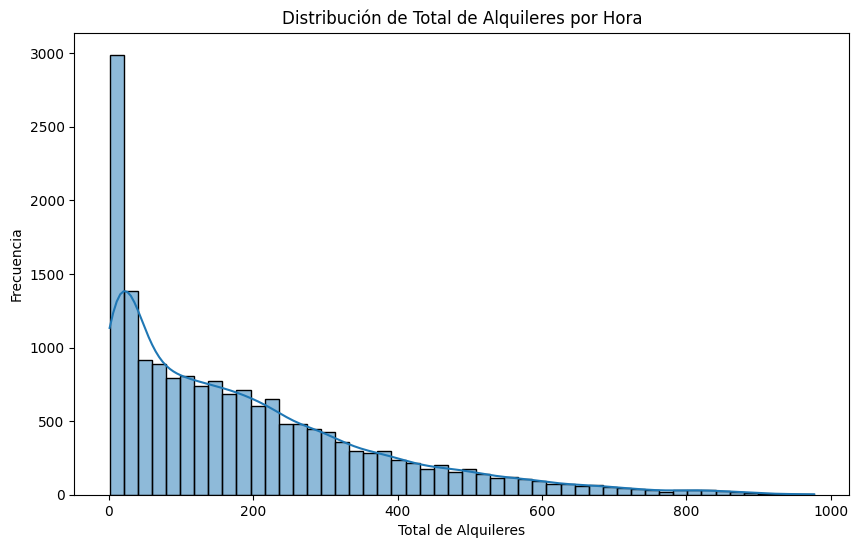

In [26]:
# Distribución de total_alquileres: Observamos que el total de alquileres generalmente es bajo
plt.figure(figsize=(10, 6))
sns.histplot(df['total_alquileres'], bins=50, kde=True)
plt.title('Distribución de Total de Alquileres por Hora')
plt.xlabel('Total de Alquileres')
plt.ylabel('Frecuencia')
plt.show()

La distribución muestra que:

La mayoría de las horas tienen pocos alquileres 

Hay algunos valores extremadamente altos 

La distribución está sesgada a la derecha

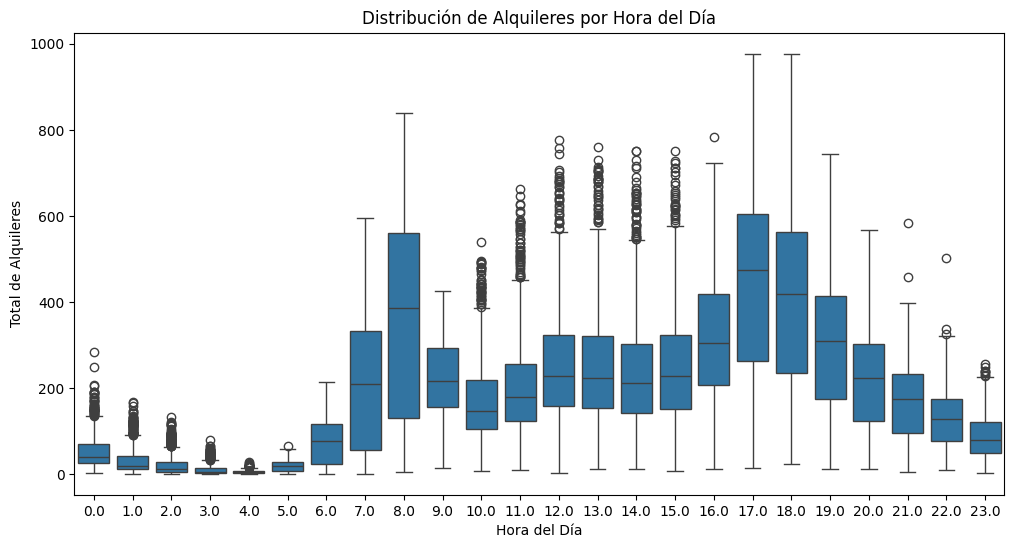

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='hora', y='total_alquileres', data=df)
plt.title('Distribución de Alquileres por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Alquileres')
plt.show()

Picos en las horas pico (8-9am y 5-6pm)

Mínimos durante la madrugada (12am-5am)

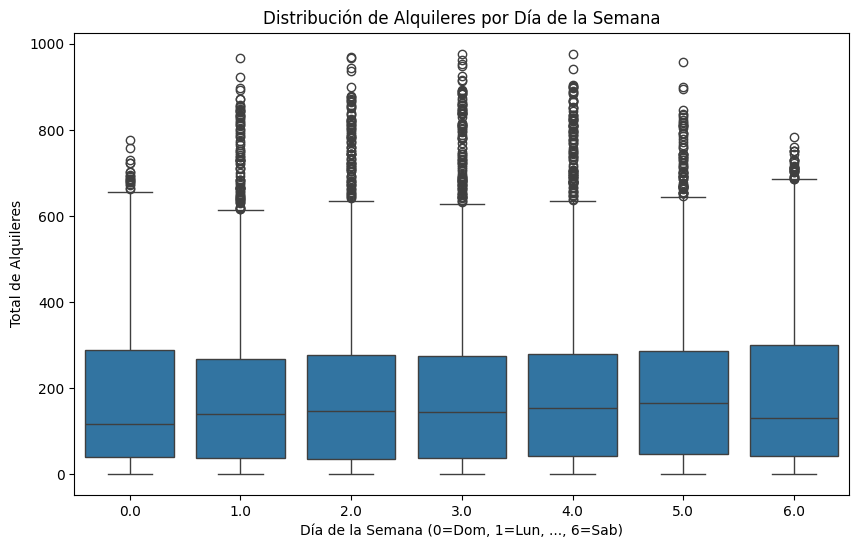

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dia_semana', y='total_alquileres', data=df)
plt.title('Distribución de Alquileres por Día de la Semana')
plt.xlabel('Día de la Semana (0=Dom, 1=Lun, ..., 6=Sab)')
plt.ylabel('Total de Alquileres')
plt.show()

Los días laborables (1-5) tienen mayor mediana de alquileres
Los fines de semana (0 y 6) tienen mayor variabilidad

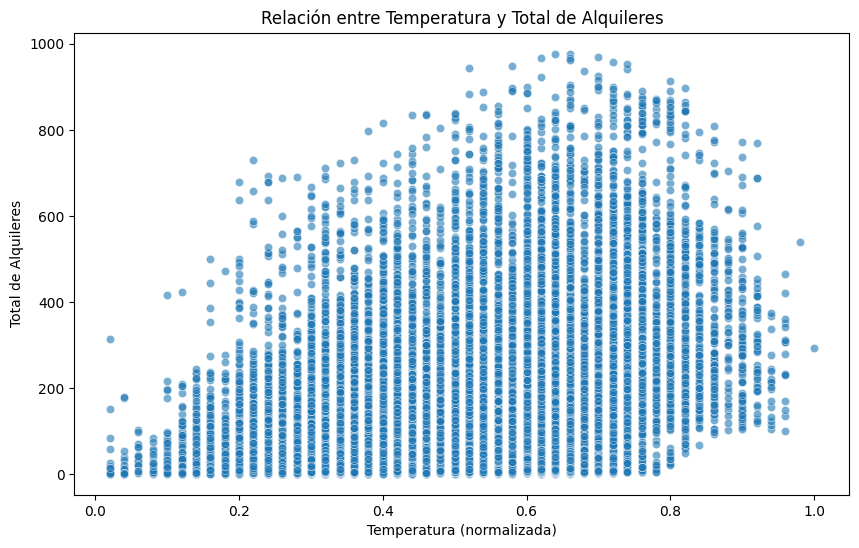

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperatura', y='total_alquileres', data=df, alpha=0.6)
plt.title('Relación entre Temperatura y Total de Alquileres')
plt.xlabel('Temperatura (normalizada)')
plt.ylabel('Total de Alquileres')
plt.show()

Existe una correlación positiva moderada

A mayor temperatura, mayor número de alquileres

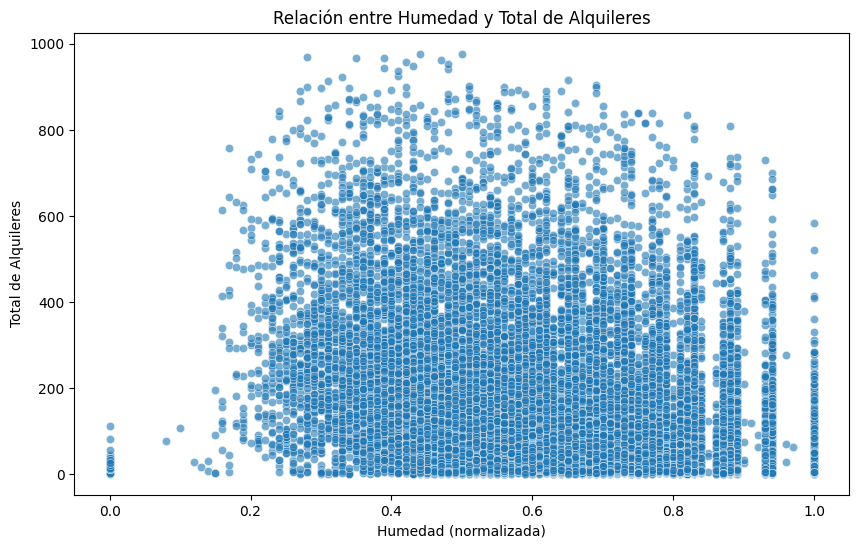

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humedad', y='total_alquileres', data=df, alpha=0.6)
plt.title('Relación entre Humedad y Total de Alquileres')
plt.xlabel('Humedad (normalizada)')
plt.ylabel('Total de Alquileres')
plt.show()

Correlación negativa moderada

Mayor humedad tiende a asociarse con menos alquileres

### Correlaciones

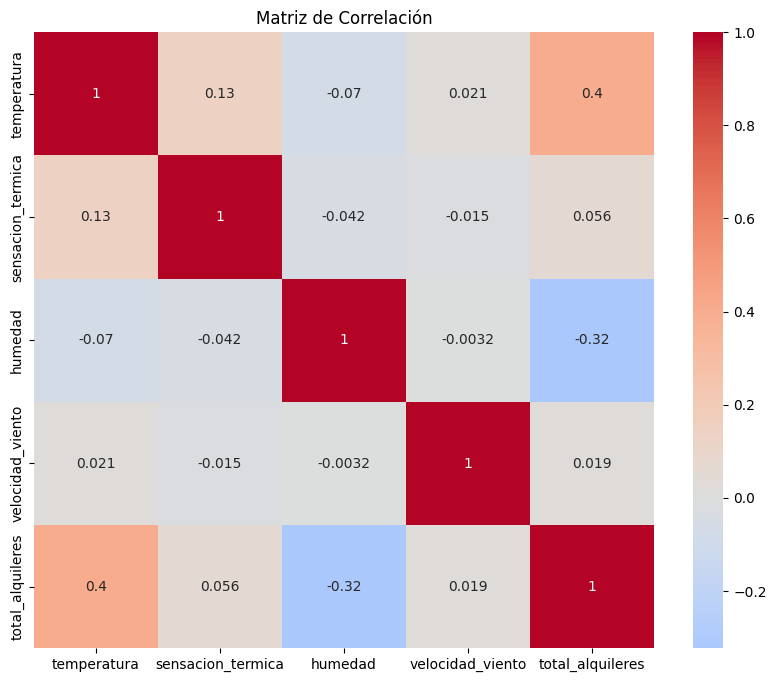

In [31]:
# Seleccionar variables numéricas
numeric_vars = ['temperatura', 'sensacion_termica', 'humedad', 'velocidad_viento', 'total_alquileres']

# Matriz de correlación
corr_matrix = df[numeric_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

Correlaciones mas fuertes con total alquileres: 
Temperatura: Correlacion positiva (0.4) 
Humedad: Correlacion negativa (-0,32)

df2 Sera igual a la eliminacion de todas las filas nulas

In [32]:
df.shape

(17379, 14)

In [33]:
df2 = df.copy()
df2 = df2.dropna(subset=['total_alquileres'])
df2 = df2.dropna(subset=['hora'])
df2 = df2.dropna(subset=['dia_semana'])

In [34]:
df2.shape

(17349, 14)

In [35]:
df2.to_csv("dataset2.csv", index=False)

df3 Sera igual a hora y dia_semana poner modas y eliminacion de total_alquileres

In [36]:
df3 = df.dropna(subset=['total_alquileres']).copy()
# Segundo: Verificar si quedan valores faltantes en hora y dia_semana
print(df[['hora', 'dia_semana']].isnull().sum())

hora          10
dia_semana    10
dtype: int64


In [37]:
# Tercero: Imputar la moda para los faltantes restantes en hora y dia_semana
from sklearn.impute import SimpleImputer

# Crear imputador de moda
mode_imputer = SimpleImputer(strategy='most_frequent')

# Aplicar solo a las columnas necesarias
df3[['hora', 'dia_semana']] = mode_imputer.fit_transform(df3[['hora', 'dia_semana']])

In [38]:
df3.shape

(17369, 14)

In [39]:
df3.to_csv("dataset3.csv", index=False)

In [40]:
df3.isna().sum()

fecha                0
temporada            0
anio                 0
mes                  0
hora                 0
feriado              0
dia_semana           0
dia_trabajo          0
clima                0
temperatura          0
sensacion_termica    0
humedad              0
velocidad_viento     0
total_alquileres     0
dtype: int64

### Manejo de outliers 

Primero hay que saber cuantos tos en sensacion_termica y velocidad_viento son mayores a 1 

In [41]:
df3.describe()

,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres
count,17369,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000
mean,2012-01-02 07:34:14.626057728,2.501929,0.502850,6.538949,11.548679,0.028787,3.005066,0.682711,1.425471,0.497019,34.166409,0.627176,18.760750,189.547527
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-05 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.348500,0.480000,0.104500,40.000000
50%,2012-01-03 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.500000,0.630000,0.223900,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.636400,0.780000,0.298500,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,803.000000,1.000000,806.000000,977.000000
std,NaN,1.106911,0.500006,3.438392,6.910984,0.167212,2.006403,0.465435,0.639453,0.192513,133.487074,0.192960,57.544577,181.401604


En sensacion termica cuantos valores son mayores a 1? 

In [42]:
def contar_mayores_que_uno(df, columna):
    """
    Cuenta cuántos valores en la columna especificada son mayores que 1.
    
    Parámetros:
    df -- DataFrame de pandas
    columna -- nombre de la columna a verificar (por defecto 'sensacion termica')
    
    Retorna:
    int -- cantidad de valores mayores que 1
    """
    return len(df[df[columna] > 1])



In [43]:
# Uso ejemplo
cantidadSensacionTermica = contar_mayores_que_uno(df, 'sensacion_termica')
print(f"Valores mayores que 1 en 'sensacion termica': {cantidadSensacionTermica}")

Valores mayores que 1 en 'sensacion termica': 1288


In [44]:
cantidadVelocidadViento = contar_mayores_que_uno(df, 'velocidad_viento')
print(f"Valores mayores que 1 en 'velocidad_viento': {cantidadVelocidadViento}")

Valores mayores que 1 en 'velocidad_viento': 1659


Text(0, 0.5, 'Frecuencia')

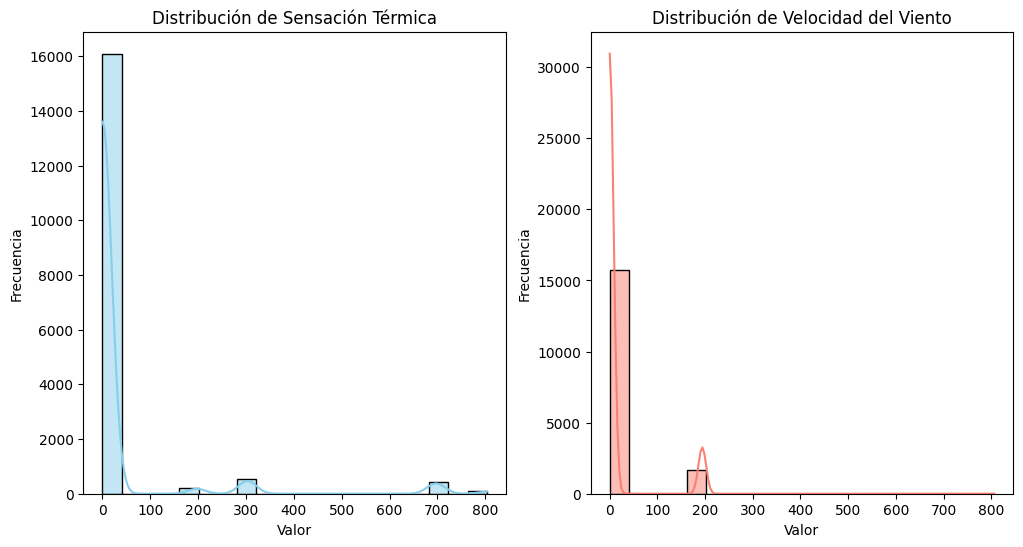

In [45]:
# Configuración inicial
plt.figure(figsize=(12, 6))

# Histograma para 'sensacion_termica'
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, posición 1
sns.histplot(df['sensacion_termica'], bins=20, kde=True, color='skyblue')
plt.title('Distribución de Sensación Térmica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, posición 2
sns.histplot(df['velocidad_viento'], bins=20, kde=True, color='salmon')
plt.title('Distribución de Velocidad del Viento')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')


Text(0, 0.5, 'Valor')

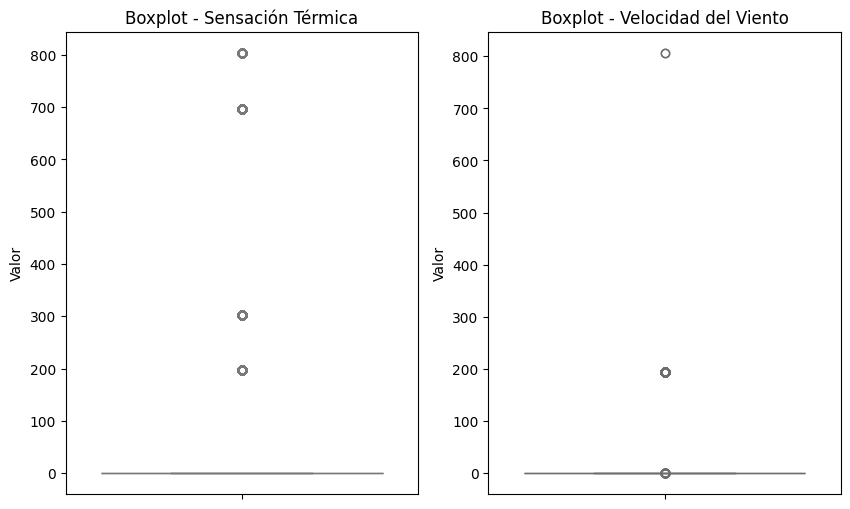

In [46]:
plt.figure(figsize=(10, 6))

# Boxplot para 'sensacion_termica'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['sensacion_termica'], color='lightblue')
plt.title('Boxplot - Sensación Térmica')
plt.ylabel('Valor')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['velocidad_viento'], color='lightcoral')
plt.title('Boxplot - Velocidad del Viento')
plt.ylabel('Valor')

Observamos que hay outliers enormes 

In [47]:
df.head()

,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres
0,2011-01-01,1,0,1,0.0,0,6.0,0,1,0.24,0.2879,0.81,0.0,16.0
1,2011-01-01,1,0,1,1.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,40.0
2,2011-01-01,1,0,1,2.0,0,6.0,0,1,0.22,0.2727,0.80,0.0,32.0
3,2011-01-01,1,0,1,3.0,0,6.0,0,1,0.24,0.2879,0.75,0.0,13.0
4,2011-01-01,1,0,1,4.0,0,NaN,0,1,0.24,0.2879,0.75,0.0,1.0


Lo que se procedera a hacer es cambiar los outliers de sensacion_termica por temperatura ya que en la vida real tendria que ser similar,
la velocidad_viento igual tendria que estar entre 0 y 1, se procedera a dividir los datos entre 1000 ya que eliminarlos afectaria al resultado del 
modelo siendo que hay 1659 datos > 1 lo cual corresponde al 9.55% del data set lo cual es significativo. 
Se procede a dividir entre 1000 y ni siquiera considerar algun tipo de escalamiento debido a que existen valores atipicos superiores a 500, no hay 
unidad ya sea m/s o km/h que corresponda a esos valores, por lo que seria un error humano.

df4 sera df3 pero cambiando los outliers

In [48]:
df4 = df3.copy()
df4.loc[df4['sensacion_termica']>1, 'sensacion_termica'] = df4['temperatura']
df4.loc[df4['velocidad_viento']>1, 'velocidad_viento'] /= 1000

In [49]:
df4.describe()

,fecha,temporada,anio,mes,hora,feriado,dia_semana,dia_trabajo,clima,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres
count,17369,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000
mean,2012-01-02 07:34:14.626057728,2.501929,0.502850,6.538949,11.548679,0.028787,3.005066,0.682711,1.425471,0.497019,0.477626,0.627176,0.190129,189.547527
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-05 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,2012-01-03 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000
std,NaN,1.106911,0.500006,3.438392,6.910984,0.167212,2.006403,0.465435,0.639453,0.192513,0.173981,0.192960,0.122356,181.401604


In [50]:
df4.isna().sum()

fecha                0
temporada            0
anio                 0
mes                  0
hora                 0
feriado              0
dia_semana           0
dia_trabajo          0
clima                0
temperatura          0
sensacion_termica    0
humedad              0
velocidad_viento     0
total_alquileres     0
dtype: int64

In [51]:
df4.to_csv('dataset4.csv', index = False)

### Tratar variables categoricas

df5 es df4 pero tratango variables categoricas con one hot encoding

In [52]:
df5 = df4.copy()

In [53]:
df5 = pd.get_dummies(df5, columns = ['temporada', 'anio', 'mes', 'hora', 'feriado', 'dia_semana', 'dia_trabajo', 'clima'])

In [54]:
df5.head()

,fecha,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres,temporada_1,temporada_2,temporada_3,temporada_4,...,dia_semana_3.0,dia_semana_4.0,dia_semana_5.0,dia_semana_6.0,dia_trabajo_0,dia_trabajo_1,clima_1,clima_2,clima_3,clima_4
0,2011-01-01,0.24,0.2879,0.81,0.0,16.0,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False
1,2011-01-01,0.22,0.2727,0.80,0.0,40.0,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False
2,2011-01-01,0.22,0.2727,0.80,0.0,32.0,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False
3,2011-01-01,0.24,0.2879,0.75,0.0,13.0,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False
4,2011-01-01,0.24,0.2879,0.75,0.0,1.0,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False


In [55]:
df5.columns

Index(['fecha', 'temperatura', 'sensacion_termica', 'humedad',
       'velocidad_viento', 'total_alquileres', 'temporada_1', 'temporada_2',
       'temporada_3', 'temporada_4', 'anio_0', 'anio_1', 'mes_1', 'mes_2',
       'mes_3', 'mes_4', 'mes_5', 'mes_6', 'mes_7', 'mes_8', 'mes_9', 'mes_10',
       'mes_11', 'mes_12', 'hora_0.0', 'hora_1.0', 'hora_2.0', 'hora_3.0',
       'hora_4.0', 'hora_5.0', 'hora_6.0', 'hora_7.0', 'hora_8.0', 'hora_9.0',
       'hora_10.0', 'hora_11.0', 'hora_12.0', 'hora_13.0', 'hora_14.0',
       'hora_15.0', 'hora_16.0', 'hora_17.0', 'hora_18.0', 'hora_19.0',
       'hora_20.0', 'hora_21.0', 'hora_22.0', 'hora_23.0', 'feriado_0',
       'feriado_1', 'dia_semana_0.0', 'dia_semana_1.0', 'dia_semana_2.0',
       'dia_semana_3.0', 'dia_semana_4.0', 'dia_semana_5.0', 'dia_semana_6.0',
       'dia_trabajo_0', 'dia_trabajo_1', 'clima_1', 'clima_2', 'clima_3',
       'clima_4'],
      dtype='object')

Esto del one hot encoder se puede hacer con onehot de sklearn, creo que eso sirve para pipelines, revisar despues

In [56]:
df5.to_csv('dataset5.csv', index = False)

Ahora que nuestro data set contiene solo variables numericas, castear todas a float64

df6 es df5 pero eliminnando el feature fecha

In [57]:
df6 = df5.copy()
df6.drop(columns = ['fecha'], inplace = True)

In [58]:
# Cast all columns of the dataframe to float64
df6 = df6.astype('float64')

df6.head()

,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres,temporada_1,temporada_2,temporada_3,temporada_4,anio_0,...,dia_semana_3.0,dia_semana_4.0,dia_semana_5.0,dia_semana_6.0,dia_trabajo_0,dia_trabajo_1,clima_1,clima_2,clima_3,clima_4
0,0.24,0.2879,0.81,0.0,16.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.22,0.2727,0.80,0.0,40.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.22,0.2727,0.80,0.0,32.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.24,0.2879,0.75,0.0,13.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.24,0.2879,0.75,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [59]:
df6.to_csv('dataset6.csv', index = False)

Convertir cada fecha a un número ordinal (días desde una fecha de referencia).

 Variables cíclicas para estacionalidad
Para componentes como mes o día de la semana, usa seno/coseno para capturar su naturaleza cíclica:

SUENA INTERESANTE, PROBAR DESPUES CON ESO MAS

Probar Standar Scaler
Despues combinado con min max scaler como dice deep seek

Hacer hyperparametros separados y con combinaciones entre random y grid

Modelar, al menos 3 modelos

Text(0, 0.5, 'Valor')

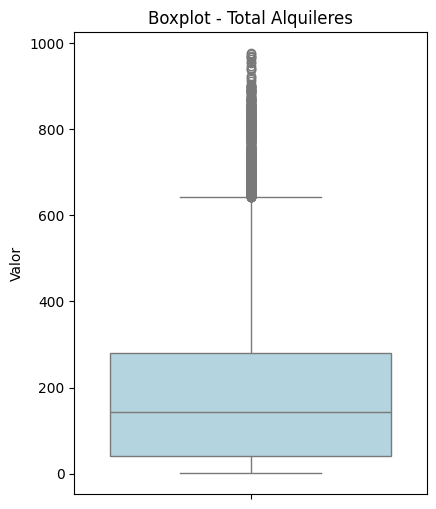

In [60]:
plt.figure(figsize=(10, 6))

# Boxplot para 'sensacion_termica'
plt.subplot(1, 2, 1)
sns.boxplot(y=df['total_alquileres'], color='lightblue')
plt.title('Boxplot - Total Alquileres')
plt.ylabel('Valor')

Hay outliers en total alquileres

In [66]:
df[df['total_alquileres']>640].shape

(513, 14)

513 valores son outliers, el 3%

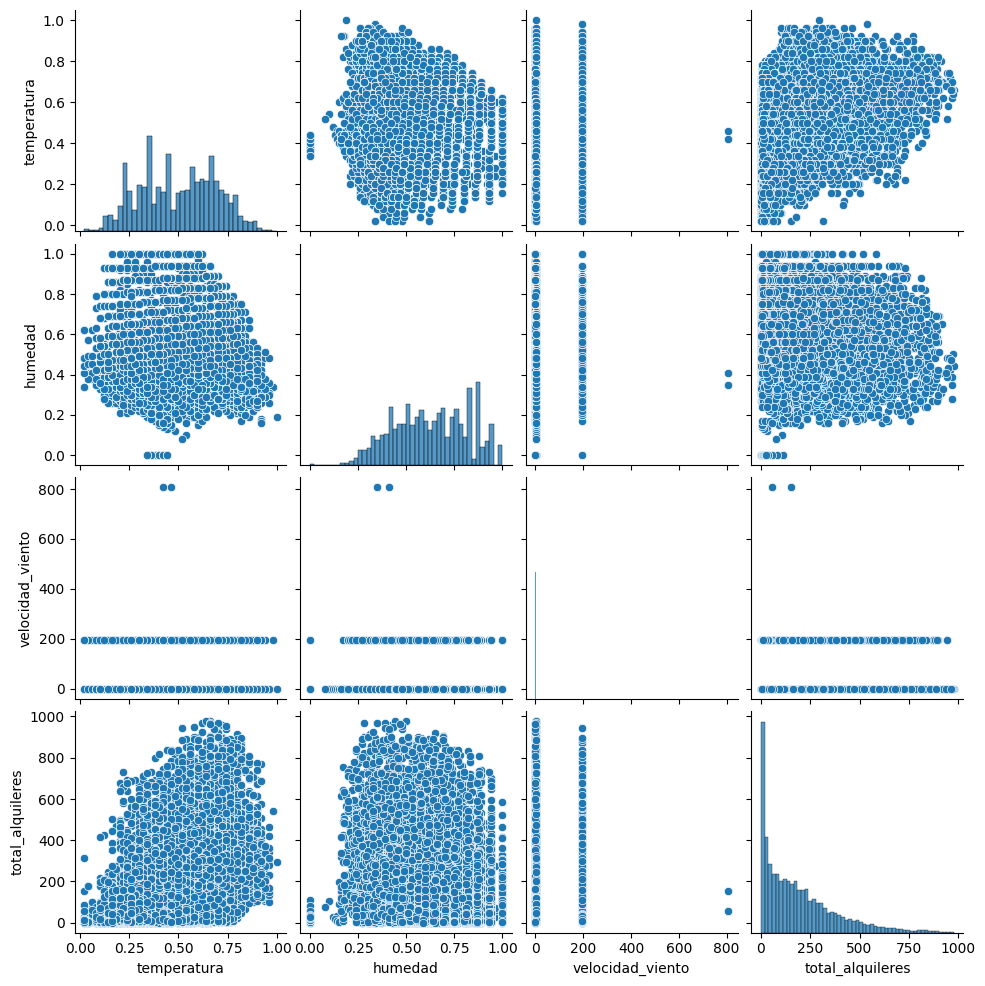

In [68]:
sns.pairplot(df[['temperatura', 'humedad', 'velocidad_viento', 'total_alquileres']])
plt.show()

In [69]:
df6.describe()

,temperatura,sensacion_termica,humedad,velocidad_viento,total_alquileres,temporada_1,temporada_2,temporada_3,temporada_4,anio_0,...,dia_semana_3.0,dia_semana_4.0,dia_semana_5.0,dia_semana_6.0,dia_trabajo_0,dia_trabajo_1,clima_1,clima_2,clima_3,clima_4
count,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.00000,17369.000000,17369.000000,17369.000000,17369.000000,...,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000,17369.000000
mean,0.497019,0.477626,0.627176,0.190129,189.547527,0.24394,0.253843,0.258564,0.243652,0.497150,...,0.142265,0.141977,0.143186,0.144913,0.317289,0.682711,0.656572,0.261558,0.081697,0.000173
std,0.192513,0.173981,0.192960,0.122356,181.401604,0.42947,0.435221,0.437858,0.429298,0.500006,...,0.349332,0.349037,0.350273,0.352024,0.465435,0.465435,0.474866,0.439496,0.273911,0.013142
min,0.020000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.340000,0.333300,0.480000,0.104500,40.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.484800,0.630000,0.194000,142.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.660000,0.621200,0.780000,0.253700,281.000000,0.00000,1.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.850700,977.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
